In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
%matplotlib inline

warnings.simplefilter('ignore')

In [3]:
antenna_poplulation = 1
tag_population = 3
actual_x = 1
y_distance = 2
sample_count = 100
frequency_mhz = 920.4
frequency = frequency_mhz * (10 ** 6)
antenna_space = 0.03
transmission_power = 30.0
light_speed = 2.998e8
wave_length = light_speed / frequency
theta_range = np.arange(-60,60.01, 0.01)

In [4]:
TARGET_TAGS = {
    "E200 4216 02D0 6410 02BC E121" : 1,
    "E200 4216 0400 6410 02BC E134" : 2,
    "E200 4216 04F0 6410 02BC E143" : 3,
}
TARGET_ANTENNA = 1
DATA_FILE_PATH1 = "data/music_90_rfmode3.csv"
DATA_FILE_PATH2 = "data/music_100_rfmode3.csv"
actual_angle = -np.arctan(actual_x / y_distance) 
print(f"actual_angle: {actual_angle * 180 / np.pi}")
print("actual phase diff: " + str(4*np.pi*antenna_space * np.sin(np.arctan(actual_x/y_distance)) / wave_length))
print("actual ant1 phase : " + str((-4*np.pi*np.sqrt(pow(y_distance, 2) + pow(actual_x, 2)) / wave_length) % (2*np.pi)))
print("actual ant2 phase : " + str((-4*np.pi*np.sqrt(pow(y_distance, 2) + pow(actual_x+antenna_space, 2)) / wave_length) % (2*np.pi)))
print("actual ant3 phase : " + str((-4*np.pi*np.sqrt(pow(y_distance, 2) + pow(actual_x+2*antenna_space, 2)) / wave_length) % (2*np.pi)))

actual_angle: -26.56505117707799
actual phase diff: 0.5175962224242736
actual ant1 phase : 1.698557229801935
actual ant2 phase : 1.1747871169775692
actual ant3 phase : 0.6388182173890726


In [5]:
df1 = pd.read_csv(DATA_FILE_PATH1)
df1 = df1[df1["frequency"] == frequency_mhz]
df1["tagNumber"] = df1["tagId"].map(TARGET_TAGS)
df1 = df1[df1["samplingNumber"] < sample_count]
df1 = df1[df1["antennaNumber"] == TARGET_ANTENNA]
df1 = df1[["tagNumber", "phase", "rssi", "samplingNumber", "frequency"]]
df2 = pd.read_csv(DATA_FILE_PATH2)
df2 = df2[df2["frequency"] == frequency_mhz]
df2["tagNumber"] = df2["tagId"].map(TARGET_TAGS)
df2 = df2[df2["samplingNumber"] < sample_count]
df2 = df2[df2["antennaNumber"] == TARGET_ANTENNA]
df2 = df2[["tagNumber", "phase", "rssi", "samplingNumber", "frequency"]]

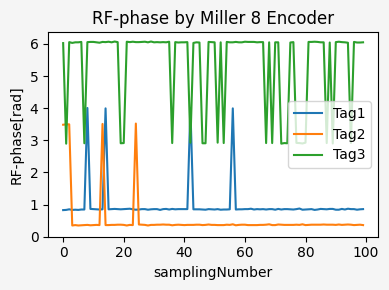

In [6]:
fig, ax = plt.subplots(tight_layout=True, facecolor="whitesmoke")
fig.set_size_inches(w=4, h=3)
df1_mod2pi = df1.copy()
for tag in range(1, tag_population+1):
    df1_mod2pi[df1_mod2pi["tagNumber"] == tag].plot(ax=ax, x="samplingNumber", y="phase",)
ax.set_yticks(np.arange(0, 7, 1))
ax.set_title("RF-phase by Miller 8 Encoder")
ax.set_ylabel("RF-phase[rad]")
plt.legend([f"Tag{tag}" for tag in range(1, tag_population+1)])
plt.show()

tag1 mean: 0.8533841919165401
rfmode3 tag1 mean: 1.5196227277110317
tag2 mean: 0.36827810755558477
rfmode3 tag2 mean: 0.9537678946757765
tag3 mean: 2.912968156963317
rfmode3 tag3 mean: 0.8864568177033542


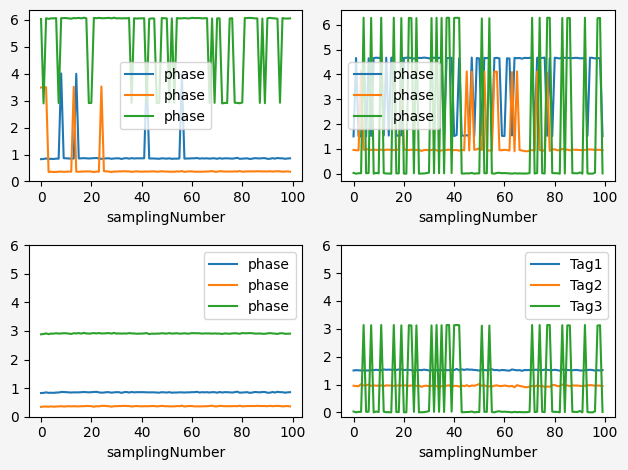

In [7]:
fig, axes = plt.subplots(2,2,tight_layout=True, facecolor="whitesmoke")
df1_modpi = df1.copy()
df2_modpi = df2.copy()
df1_mod2pi = df1.copy()
df2_mod2pi = df2.copy()
df1_modpi["phase"] = (df1_modpi["phase"]) % np.pi 
df2_modpi["phase"] = (df2_modpi["phase"]) % np.pi 
for tag in range(1, tag_population+1):
    mean1 = df1_modpi[df1_modpi["tagNumber"]==tag]["phase"]
    mean2 = df2_modpi[df2_modpi["tagNumber"]==tag]["phase"]
    print(f"tag{tag} mean: {mean1.mean()}")
    print(f"rfmode3 tag{tag} mean: {mean2.mean()}")
    df1_mod2pi[df1_mod2pi["tagNumber"] == tag].plot(ax=axes[0][0], x="samplingNumber", y="phase",)
    df2_mod2pi[df2_mod2pi["tagNumber"] == tag].plot(ax=axes[0][1], x="samplingNumber", y="phase",)
    df1_modpi[df1_modpi["tagNumber"] == tag].plot(ax=axes[1][0], x="samplingNumber", y="phase",)
    df2_modpi[df2_modpi["tagNumber"] == tag].plot(ax=axes[1][1], x="samplingNumber", y="phase",)
axes[0][0].set_yticks(np.arange(0, 7, 1))
plt.legend([f"Tag{tag}" for tag in range(1, tag_population+1)])
axes[0][1].set_yticks(np.arange(0, 7, 1))
axes[1][0].set_yticks(np.arange(0, 7, 1))
axes[1][1].set_yticks(np.arange(0, 7, 1))
plt.show()

In [8]:
data_list1 = []
data_list2 = []
for tag in range(1, tag_population+1):
    df_tag = df1[df1["tagNumber"] == tag]
    if DATA_FILE_PATH1 == "data/music_10_rfmode3.csv":
        if tag == 3:
            df_tag["phase"] = df_tag["phase"] + 0.06
    if DATA_FILE_PATH1 == "data/music_20_rfmode3.csv":
        if tag == 3:
            df_tag["phase"] = df_tag["phase"] - 0.03
    if DATA_FILE_PATH1 == "data/music_30_rfmode3.csv":
        if tag==3:
            df_tag["phase"] = df_tag["phase"] - 1.9
    if DATA_FILE_PATH1 == "data/music_40_rfmode3.csv":
        if tag==2:
            df_tag["phase"] = df_tag["phase"] + 0.1
    if DATA_FILE_PATH1 == "data/music_50_rfmode3.csv":
        if tag==3:
            df_tag["phase"] = df_tag["phase"] - 0.49
        if tag==2:
            df_tag["phase"] = df_tag["phase"] - 0.3
    if DATA_FILE_PATH1 == "data/music_60_rfmode3.csv":
        if tag==3:
            df_tag["phase"] = df_tag["phase"] + 0.31
    if DATA_FILE_PATH1 == "data/music_70_rfmode3.csv":
        if tag==2:
            df_tag["phase"] = df_tag["phase"] - 0.05
    if DATA_FILE_PATH1 == "data/music_80_rfmode3.csv":
        if tag==3:
            df_tag["phase"] = df_tag["phase"] - 0.1
    if DATA_FILE_PATH1 == "data/music_90_rfmode3.csv":
        if tag==2:
            df_tag["phase"] = df_tag["phase"] - 0.09
    if DATA_FILE_PATH1 == "data/music_100_rfmode3.csv":
        if tag ==3:
            df_tag["phase"] = df_tag["phase"] + 0.3

    data_list1.append([df_tag["phase"][:sample_count].tolist()])
    df_tag = df2[df2["tagNumber"] == tag]
    
    if DATA_FILE_PATH2 == "data/music_10_rfmode3.csv":
        if tag == 3:
            df_tag["phase"] = df_tag["phase"] + 0.06
    if DATA_FILE_PATH2 == "data/music_20_rfmode3.csv":
        if tag == 3:
            df_tag["phase"] = df_tag["phase"] - 0.03
    if DATA_FILE_PATH2 == "data/music_30_rfmode3.csv":
        if tag==3:
            df_tag["phase"] = df_tag["phase"] - 1.1
    if DATA_FILE_PATH2 == "data/music_40_rfmode3.csv":
        if tag==2:
            df_tag["phase"] = df_tag["phase"] + 0.1
    if DATA_FILE_PATH2 == "data/music_50_rfmode3.csv":
        if tag==3:
            df_tag["phase"] = df_tag["phase"] - 0.49
        if tag==2:
            df_tag["phase"] = df_tag["phase"] - 0.3
    if DATA_FILE_PATH2 == "data/music_60_rfmode3.csv":
        if tag==3:
            df_tag["phase"] = df_tag["phase"] + 0.31
    if DATA_FILE_PATH2 == "data/music_70_rfmode3.csv":
        if tag==2:
            df_tag["phase"] = df_tag["phase"] - 0.05
    if DATA_FILE_PATH2 == "data/music_80_rfmode3.csv":
        if tag==2:
            df_tag["phase"] = df_tag["phase"] - 0.1
    if DATA_FILE_PATH2 == "data/music_90_rfmode3.csv":
        if tag==2:
            df_tag["phase"] = df_tag["phase"] - 0.09
    if DATA_FILE_PATH2 == "data/music_100_rfmode3.csv":
        if tag ==3:
            df_tag["phase"] = df_tag["phase"] + 0.3
    
    data_list2.append([df_tag["phase"][:sample_count].tolist()])
data_list1 = np.array(data_list1).T
data_list2 = np.array(data_list2).T

In [9]:
def rfmirror_modeling(phase_diff_data: np.ndarray):
        phase_diff_data = np.where(
            (-np.pi <= phase_diff_data) & (phase_diff_data < -np.pi / 2),
            phase_diff_data + np.pi,
            phase_diff_data,
        )

        phase_diff_data = np.where(
            (np.pi / 2 <= phase_diff_data) & (phase_diff_data <= np.pi),
            phase_diff_data - np.pi,
            phase_diff_data,
        )

        return phase_diff_data

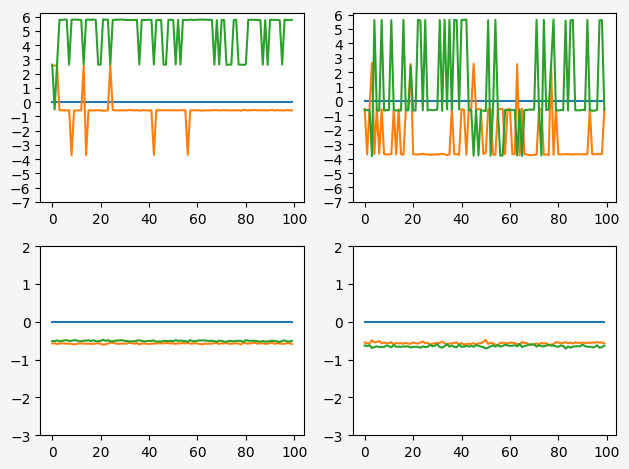

In [10]:
phase_diff_data_list1 = np.array(
            [
                np.append(
                    np.zeros((antenna_poplulation, 1)), np.diff(data, n=1), axis=1
                )
                for data in data_list1
            ]
        ).T

phase_diff_data_list2 = np.array(
            [
                np.append(
                    np.zeros((antenna_poplulation, 1)), np.diff(data, n=1), axis=1
                )
                for data in data_list2
            ]
        ).T

data_list1_modpi = data_list1.copy() % np.pi

phase_diff_data_list1_modpi = np.array(
            [
                np.append(
                    np.zeros((antenna_poplulation, 1)), np.diff(data, n=1), axis=1
                )
                for data in data_list1_modpi
            ]
        ).T


data_list2_modpi = data_list2.copy() % np.pi

phase_diff_data_list2_modpi = np.array(
            [
                np.append(
                    np.zeros((antenna_poplulation, 1)), np.diff(data, n=1), axis=1
                )
                for data in data_list2_modpi
            ]
        ).T

phase_diff_data_list1_modpi = rfmirror_modeling(phase_diff_data_list1_modpi)
phase_diff_data_list2_modpi = rfmirror_modeling(phase_diff_data_list2_modpi)
sample_range= range(sample_count)
fig,axes = plt.subplots(2,2,tight_layout=True, facecolor="whitesmoke")
for tag in range(1, tag_population+1):
    axes[0][0].plot(sample_range, phase_diff_data_list1[tag-1, 0, :])
    axes[0][1].plot(sample_range, phase_diff_data_list2[tag-1, 0, :])
    axes[1][0].plot(sample_range, phase_diff_data_list1_modpi[tag-1, 0, :])
    axes[1][1].plot(sample_range, phase_diff_data_list2_modpi[tag-1, 0, :])

for i in range(2):
    axes[0][i].set_yticks(np.arange(-7, 7, 1))
    axes[1][i].set_yticks(np.arange(-3, 3, 1))

In [11]:
from classes.music import MUSIC


music = MUSIC(antenna_poplulation=tag_population, tag_population=antenna_poplulation, frequency=frequency, sampling_count=sample_count, antenna_space=antenna_space, theta_range=theta_range)
music_spectrum1 = music.get_music_spectrum(phase_data_list=data_list1)
estimated_angles1 = music.peak_search(music_spectrum=music_spectrum1)
music_spectrum2 = music.get_music_spectrum(phase_data_list=data_list2)
estimated_angles2 = music.peak_search(music_spectrum=music_spectrum2)
print(estimated_angles1)
print(estimated_angles2)

[-25.97]
[-33.99]


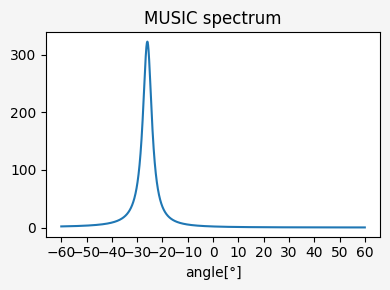

In [14]:
fig, ax = plt.subplots(1, 1, tight_layout=True, facecolor="whitesmoke")
fig.set_size_inches(w=4, h=3)
x = theta_range
ax.plot(x, music_spectrum1)
ax.set_xticks(np.arange(-60, 61, step=10))
ax.set_title("MUSIC spectrum")
ax.set_xlabel("angle[°]")
# ax[1].plot(x, music_spectrum2)
# ax[1].set_xticks(np.arange(-60, 61, step=10))
# ax[1].set_title("MUSIC spctrum")
# ax[1].set_xlabel("angle[°]")
plt.show()

In [13]:
cdf = np.empty(400)
error = music.get_error_list(data_list2, real_angle=actual_angle * 180 / np.pi)
cdf = cdf + music.get_cdf(error)

estimated angle: -32.180000000005535, error: 5.614948822927545
estimated angle: -33.92000000000519, error: 7.354948822927199
estimated angle: -32.29000000000551, error: 5.724948822927523
estimated angle: -34.48000000000508, error: 7.914948822927087
estimated angle: -35.240000000004926, error: 8.674948822926936
estimated angle: -34.10000000000515, error: 7.534948822927163
estimated angle: -35.000000000004974, error: 8.434948822926984
estimated angle: -34.24000000000513, error: 7.674948822927142
estimated angle: -35.12000000000496, error: 8.554948822926967
estimated angle: -32.8500000000054, error: 6.2849488229274115
estimated angle: -32.93000000000539, error: 6.364948822927403
estimated angle: -34.75000000000502, error: 8.184948822927034
estimated angle: -32.06000000000556, error: 5.494948822927569
estimated angle: -35.01000000000497, error: 8.444948822926982
estimated angle: -34.710000000005024, error: 8.144948822927034
estimated angle: -42.20000000000354, error: 15.634948822925551
est

KeyboardInterrupt: 

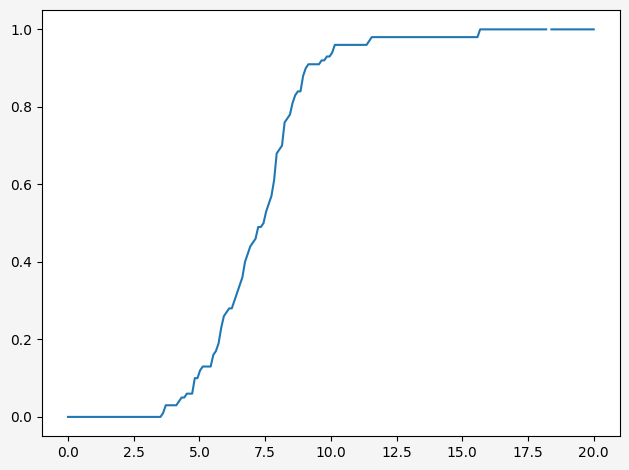

In [ ]:
fig, ax = plt.subplots(tight_layout=True, facecolor="whitesmoke")
ax.plot(np.linspace(0, 20, 200), cdf[0: 200])